In [34]:
!pip install pykrx
from pykrx import stock
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data

In [9]:
# 19년 12월달 삼성전자의 주가 불러오기
samsung_df = stock.get_market_ohlcv_by_date("20191201", "20191231", "005930")

In [10]:
samsung_df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2019-12-02,50900,51300,50400,50400,18877252
2019-12-03,49800,50300,49500,49900,12059812
2019-12-04,49600,49850,49000,49450,13246549
2019-12-05,50200,50400,49500,49500,10449715
2019-12-06,50100,50900,49950,50400,11414563


In [11]:
# 19년 12월달 네이버의 주가 불러오기
naver_df = stock.get_market_ohlcv_by_date("20191201", "20191231", "035420")

In [12]:
naver_df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2019-12-02,172500,175000,170000,171500,275601
2019-12-03,170500,173500,168500,172000,245675
2019-12-04,172000,175500,171000,174500,228851
2019-12-05,173000,174000,170000,170500,271499
2019-12-06,172000,174500,170500,174000,208849


In [15]:
naver_up_state = naver_df[naver_df['시가']<naver_df['종가']]
len(naver_up_state)
# 31일 중 11일이 상승 마감

11

In [74]:
# 삼성전자의 18년 1년치 데이터 불러오기
one_year_samsung_df = stock.get_market_ohlcv_by_date("20180101", "20181231", "005930", adjusted=False)

<function matplotlib.pyplot.show(*args, **kw)>

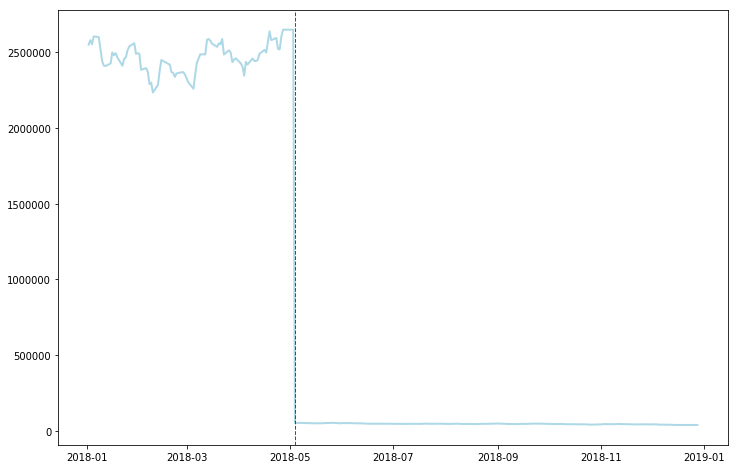

In [75]:
plt.figure(figsize = (12,8))
plt.plot(one_year_samsung_df.index, one_year_samsung_df['종가'],color = 'lightblue',linewidth=2)
plt.axvline(x=datetime(2018, 5, 4), color='r', linestyle='--', linewidth=1)
plt.show

삼성전자는 2018/05/04에 50:1의 액면 분할을 실시해서 주식 가격이 250만 원에서 5만 원으로 변경함

따라서 수정 종가를 미반영된 상태로 삼성전자를 백테스팅하면 98%의 손실이 발생하는 잘못된 결과를 얻게 됨

이러한 혼란을 줄이기 위해 유가증권 시장에서는 수정주가를 사용

현재 주가의 수준을 고려해서 과거 주가를 조정함으로써 가격의 연속성을 보장

<function matplotlib.pyplot.show(*args, **kw)>

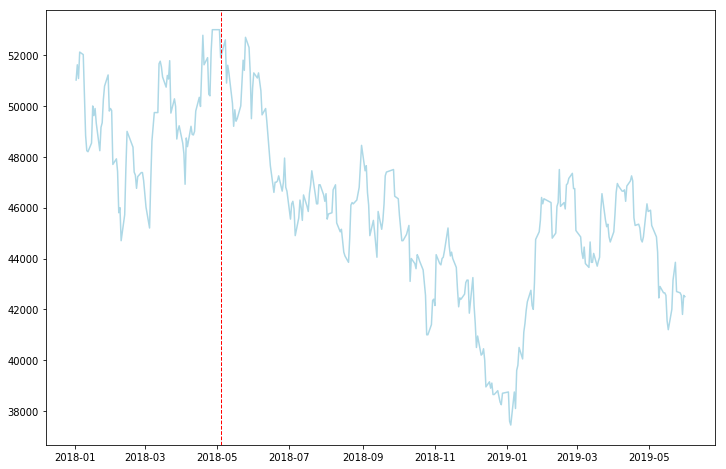

In [68]:
ad_one_year_samsung_df = stock. get_market_ohlcv_by_date("20180101", "20190531", "005930", adjusted=True)

plt.figure(figsize = (12,8))
plt.plot(ad_one_year_samsung_df.index, ad_one_year_samsung_df['종가'],color = 'lightblue')
plt.axvline(x=datetime(2018, 5, 4), color='r', linestyle='--', linewidth=1)
plt.show

In [78]:
samsung_df['전날거래량'] = samsung_df['거래량'].shift(1)
tra_sam = samsung_df['거래량'] > samsung_df['전날거래량']
tra_sam
print('영업일 : {}'.format(len(samsung_df)))
print('상승일 : {}'.format(len(samsung_df[tra_sam])))

영업일 : 20
상승일 : 7


In [82]:
# 5일 주가 이동평균

one_year_samsung_df = stock.get_market_ohlcv_by_date("20190101", "20191231", "005930", adjusted=True)
one_year_samsung_df['5일이동평균'] = one_year_samsung_df['종가'].rolling(window=5).mean()
display(one_year_samsung_df.head(10))

over_mean = one_year_samsung_df['5일이동평균'].shift(1) < one_year_samsung_df['시가']
print('영업일 : {}'.format(len(one_year_samsung_df)))
print('상승일 : {}'.format(len(one_year_samsung_df[over_mean])))

,시가,고가,저가,종가,거래량,5일이동평균
날짜,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,NaN
2019-01-03,38300,38550,37450,37600,12471493,NaN
2019-01-04,37450,37600,36850,37450,14108958,NaN
2019-01-07,38000,38900,37800,38750,12748997,NaN
2019-01-08,38000,39200,37950,38100,12756554,38130.0
2019-01-09,38650,39600,38300,39600,17452708,38300.0
2019-01-10,40000,40150,39600,39800,14731699,38740.0
2019-01-11,40350,40550,39950,40500,11661063,39350.0
2019-01-14,40450,40700,39850,40050,11984996,39610.0


영업일 : 246
상승일 : 139


In [83]:
monthly = one_year_samsung_df.resample('M').first()
display(monthly)

,시가,고가,저가,종가,거래량,5일이동평균
날짜,,,,,,
2019-01-31,39400,39400,38550,38750,7847664,38130.0
2019-02-28,46650,46950,46250,46350,13832454,45890.0
2019-03-31,46000,46100,44800,44850,12926539,46160.0
2019-04-30,45200,45450,44850,45050,7362129,45030.0
2019-05-31,45500,46150,45400,45900,8625126,45480.0
2019-06-30,42950,43900,42500,43800,15466580,42640.0
2019-07-31,47350,47400,46250,46600,11383522,46280.0
2019-08-31,44900,45500,44850,45200,7811181,46070.0
2019-09-30,44850,44850,43650,43800,7185537,43880.0


In [85]:
how = {"시가": "first",
       "종가": "last",
       "고가": "max",
       "저가": "min",
       "거래량": "sum"}
monthly = one_year_samsung_df.resample('MS').apply(how)
display(monthly)

,시가,종가,고가,저가,거래량
날짜,,,,,
2019-01-01,39400,46150,47050,36850,301783852
2019-02-01,46650,45100,47550,44250,194923203
2019-03-01,46000,44650,47000,43100,223260605
2019-04-01,45200,45850,47600,43800,209113436
2019-05-01,45500,42500,46150,40850,271585071
2019-06-01,42950,47000,47000,42500,194668243
2019-07-01,47350,45350,47550,44350,183771791
2019-08-01,44900,44000,45500,42500,205260271
2019-09-01,44850,49050,49650,43100,207963296
